In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Volumetric_features.csv")
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 0 to 4225
Columns: 141 entries, S.No to dataset
dtypes: float64(122), int64(19)
memory usage: 4.6 MB


In [3]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop(["Age"], axis=1)
y = data["Age"].values

X_norm = MinMaxScaler().fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.30, random_state=42)

In [5]:
knn = KNeighborsClassifier(n_neighbors=39)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=39)

In [6]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error as MSE # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("Training R^2: ", r2_train*100)

r2_test = r2_score(y_test, y_pred_test)
print("Testing R^2: ", r2_test*100)

rmse_norm = np.sqrt(MSE(y_test,y_pred_test))/(max(y_test)-min(y_test))
print("RMSE Norm for Testing Data: ", rmse_norm)

rmse_norm = np.sqrt(MSE(y_train,y_pred_train))/(max(y_train)-min(y_train))
print("RMSE Norm for Training Data: ", rmse_norm)

Training R^2:  71.04363239960503
Testing R^2:  71.69200595768812
RMSE Norm for Testing Data:  0.14003814118319596
RMSE Norm for Training Data:  0.13854355864425222


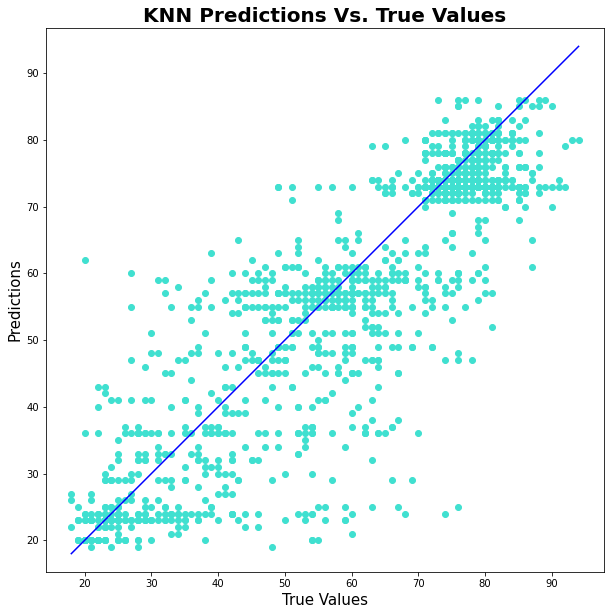

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test, c='turquoise')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred_test), max(y_test))
p2 = min(min(y_pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('KNN Predictions Vs. True Values', fontsize=20, fontweight='bold')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()